<a href="https://colab.research.google.com/github/christophermalone/DSCI325/blob/main/Module3_Part6_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3 - Part 6 Python: Data Verb - OUTER JOIN

The following python packages will be used for this notebook.

In [3]:
import pandas as pd
import numpy as np

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

### Example 3.6.P
For this notebook, we will consider data from a study on stress and workplace violence. This survey was done at a large healthcare facility. 
*    Initial Outcomes were collected
*    An wellness campaign was introduced with the goal of reducing stress and workplace violence
*    Outcomes were collected a second time after the week long awareness campaign was completed
*   Each employee was asked to complete both the pre and post surveys.  An unique Survey ID was provided in the email sent to each employee


<ul>
  <li><strong>Survey Link</strong>: https://forms.gle/urzhGs7QobquQYst9 </li>
<br>
  <li><strong>Survey Questions</strong></li>

<table>
  <tr>
    <td align='center' bgcolor='lightgray'><strong>Question ID</strong></td>
    <td align='center' bgcolor='lightgray'><strong>Question</strong></td>
    <td align='center' bgcolor='lightgray'><strong>Part</strong></td>
    <td align='center' bgcolor='lightgray'><strong>Section</strong></td>
    <td align='center' bgcolor='lightgray'><strong>Statement</strong></td>
  </tr>
<tr><td align='center'>Q1_1</td><td align='center'>1</td><td align='center'>1</td><td align='left'>Support from Supervisor</td><td align='left'>How often do you get the support you need from your immediate supervisor?</td></tr>
<tr><td align='center'>Q2_1</td><td align='center'>2</td><td align='center'>1</td><td align='left'>Support from Supervisor</td><td align='left'>To what extent would you say your immediate supervisor is good at solving conflicts?</td></tr>
<tr><td align='center'>Q2_2</td><td align='center'>2</td><td align='center'>2</td><td align='left'>Support from Supervisor</td><td align='left'>To what extent would you say your immediate supervisor is good at solving problems?</td></tr>
<tr><td align='center'>Q2_3</td><td align='center'>2</td><td align='center'>3</td><td align='left'>Support from Supervisor</td><td align='left'>To what extent would you say your immediate supervisor is good at providing a respectful work environment?</td></tr>
<tr><td align='center'>Q3_1</td><td align='center'>3</td><td align='center'>1</td><td align='left'>Stress</td><td align='left'>How often have you found it hard to go to sleep?</td></tr>
<tr><td align='center'>Q3_2</td><td align='center'>3</td><td align='center'>2</td><td align='left'>Stress</td><td align='left'>How often have you woken up early and not been able to go back to sleep?</td></tr>
<tr><td align='center'>Q3_3</td><td align='center'>3</td><td align='center'>3</td><td align='left'>Stress</td><td align='left'>How often have you felt worn out?</td></tr>
<tr><td align='center'>Q3_4</td><td align='center'>3</td><td align='center'>4</td><td align='left'>Stress</td><td align='left'>How often have you felt physically exhausted?</td></tr>
<tr><td align='center'>Q3_5</td><td align='center'>3</td><td align='center'>5</td><td align='left'>Stress</td><td align='left'>How often have you felt tired?</td></tr>
<tr><td align='center'>Q3_6</td><td align='center'>3</td><td align='center'>6</td><td align='left'>Stress</td><td align='left'>How often have you felt irritable?</td></tr>
<tr><td align='center'>Q3_7</td><td align='center'>3</td><td align='center'>7</td><td align='left'>Stress</td><td align='left'>How often have you felt tense?</td></tr>
<tr><td align='center'>Q3_8</td><td align='center'>3</td><td align='center'>8</td><td align='left'>Stress</td><td align='left'>How often have you had a stomach ache?</td></tr>
<tr><td align='center'>Q3_9</td><td align='center'>3</td><td align='center'>9</td><td align='left'>Stress</td><td align='left'>How often have you had a headache?</td></tr>
<tr><td align='center'>Q3_10</td><td align='center'>3</td><td align='center'>10</td><td align='left'>Stress</td><td align='left'>How often have you had tension in your muscles?</td></tr>
<tr><td align='center'>Q3_11</td><td align='center'>3</td><td align='center'>11</td><td align='left'>Stress</td><td align='left'>How often have you found it difficult to think clearly?</td></tr>
<tr><td align='center'>Q3_12</td><td align='center'>3</td><td align='center'>12</td><td align='left'>Stress</td><td align='left'>How often have you had difficulty in making decisions?</td></tr>
<tr><td align='center'>Q3_13</td><td align='center'>3</td><td align='center'>13</td><td align='left'>Stress</td><td align='left'>How often have you had difficulty in remembering things?</td></tr>
<tr><td align='center'>Q3_14</td><td align='center'>3</td><td align='center'>14</td><td align='left'>Stress</td><td align='left'>How often have have you felt sad?</td></tr>
<tr><td align='center'>Q3_15</td><td align='center'>3</td><td align='center'>15</td><td align='left'>Stress</td><td align='left'>How often have you lacked interest in everyday things?</td></tr>
<tr><td align='center'>Q4_1</td><td align='center'>4</td><td align='center'>1</td><td align='left'>Workplace Violence</td><td align='left'>Have you been exposed to slander at your workplace over the past six months?</td></tr>
<tr><td align='center'>Q4_2</td><td align='center'>4</td><td align='center'>2</td><td align='left'>Workplace Violence</td><td align='left'>Have you been involved in personal conflicts at your workplace over the past six months?</td></tr>
<tr><td align='center'>Q4_3</td><td align='center'>4</td><td align='center'>3</td><td align='left'>Workplace Violence</td><td align='left'>Have you been exposed to bullying at your workplace over the past six months?</td></tr>
<tr><td align='center'>Q4_4</td><td align='center'>4</td><td align='center'>4</td><td align='left'>Workplace Violence</td><td align='left'>Have you been exposed to undesired sexual attention at your workplace over the past six months?</td></tr>
<tr><td align='center'>Q4_5</td><td align='center'>4</td><td align='center'>5</td><td align='left'>Workplace Violence</td><td align='left'>Have you been exposed to physical violence at your workplace over the past six months?</td></tr>
</table>

<br><br>


  <li><strong>Scoring of Questions</strong></li>


<table>
  <tr>
    <td align='center' bgcolor='lightgray'><strong>Question</strong></td>
    <td align='center' bgcolor='lightgray'><strong>Response</strong></td>
    <td align='center' bgcolor='lightgray'><strong>Q_Response</strong></td>
    <td align='center' bgcolor='lightgray'><strong>Score</strong></td>
  </tr>
<tr><td align='center'>Q1</td><td align='left'>Always</td><td align='left'>Q1_Always</td><td align='center'>5</td></tr>
<tr><td align='center'>Q1</td><td align='left'>Often</td><td align='left'>Q1_Often</td><td align='center'>4</td></tr>
<tr><td align='center'>Q1</td><td align='left'>Sometimes</td><td align='left'>Q1_Sometimes</td><td align='center'>3</td></tr>
<tr><td align='center'>Q1</td><td align='left'>Seldom</td><td align='left'>Q1_Seldom</td><td align='center'>2</td></tr>
<tr><td align='center'>Q1</td><td align='left'>Hardly Ever</td><td align='left'>Q1_Hardly Ever</td><td align='center'>1</td></tr>
<tr><td align='center'>Q1</td><td align='left'>I do not have a supervisor</td><td align='left'>Q1_I do not have a supervisor</td><td align='center'>NaN</td></tr>
<tr><td align='center'>Q2</td><td align='left'>To a very large extent</td><td align='left'>Q2_To a very large extent</td><td align='center'>5</td></tr>
<tr><td align='center'>Q2</td><td align='left'>To a large extent</td><td align='left'>Q2_To a large extent</td><td align='center'>4</td></tr>
<tr><td align='center'>Q2</td><td align='left'>Somewhat</td><td align='left'>Q2_Somewhat</td><td align='center'>3</td></tr>
<tr><td align='center'>Q2</td><td align='left'>To a small extent</td><td align='left'>Q2_To a small extent</td><td align='center'>2</td></tr>
<tr><td align='center'>Q2</td><td align='left'>To a very small extent</td><td align='left'>Q2_To a very small extent</td><td align='center'>1</td></tr>
<tr><td align='center'>Q2</td><td align='left'>I do not have a supervisor</td><td align='left'>Q2_I do not have a supervisor</td><td align='center'>NaN</td></tr>
<tr><td align='center'>Q3</td><td align='left'>All of the time</td><td align='left'>Q3_All of the time</td><td align='center'>5</td></tr>
<tr><td align='center'>Q3</td><td align='left'>A large part of the time</td><td align='left'>Q3_A large part of the time</td><td align='center'>4</td></tr>
<tr><td align='center'>Q3</td><td align='left'>Part of the time</td><td align='left'>Q3_Part of the time</td><td align='center'>3</td></tr>
<tr><td align='center'>Q3</td><td align='left'>A small part of the time</td><td align='left'>Q3_A small part of the time</td><td align='center'>2</td></tr>
<tr><td align='center'>Q3</td><td align='left'>A very small part of the time</td><td align='left'>Q3_A very small part of the time</td><td align='center'>1</td></tr>
<tr><td align='center'>Q3</td><td align='left'>Not at all</td><td align='left'>Q3_Not at all</td><td align='center'>0</td></tr>
<tr><td align='center'>Q4_1</td><td align='left'>Yes</td><td align='left'>Q4_1_Yes</td><td align='center'>1</td></tr>
<tr><td align='center'>Q4_1</td><td align='left'>No</td><td align='left'>Q4_1_No</td><td align='center'>0</td></tr>
<tr><td align='center'>Q4_2</td><td align='left'>Yes</td><td align='left'>Q4_2_Yes</td><td align='center'>1</td></tr>
<tr><td align='center'>Q4_2</td><td align='left'>No</td><td align='left'>Q4_2_No</td><td align='center'>0</td></tr>
<tr><td align='center'>Q4_3</td><td align='left'>Yes</td><td align='left'>Q4_3_Yes</td><td align='center'>1</td></tr>
<tr><td align='center'>Q4_3</td><td align='left'>No</td><td align='left'>Q4_3_No</td><td align='center'>0</td></tr>
<tr><td align='center'>Q4_4</td><td align='left'>Yes</td><td align='left'>Q4_4_Yes</td><td align='center'>2</td></tr>
<tr><td align='center'>Q4_4</td><td align='left'>No</td><td align='left'>Q4_4_No</td><td align='center'>0</td></tr>
<tr><td align='center'>Q4_5</td><td align='left'>Yes</td><td align='left'>Q4_5_Yes</td><td align='center'>2</td></tr>
<tr><td align='center'>Q4_5</td><td align='left'>No</td><td align='left'>Q4_5_No</td><td align='center'>0</td></tr>
</table>
</ul>
<br><br>

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

The following data files are needed for this notebook.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=17nj1gL7oLIzeJTiKVAd5qG0g5wXw2LCx"></p>

### Aside: Google Sheet Style Output in Colab

<table width='100%' ><tr><td bgcolor='orange'></td></tr></table>

The following extension can be used to preview data via a Google Sheet structure inside of Colab.

In [10]:
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


The following command can be used to unload this extension from this session of Colab.

In [24]:
%unload_ext google.colab.data_table

The google.colab.data_table extension is not loaded.


<table width='100%' ><tr><td bgcolor='orange'></td></tr></table>

## Brute Force Approach to Recode Pre

We will make extensive use of the <strong>dfply</strong> package in our analysis.

In [25]:
pip install dfply

Next, import the dfply package into this session of Colab.

In [26]:
from dfply import *

To begin, read-in the Pre data - data collected before the wellness campaign was initiated.

In [27]:
Pre = pd.read_csv("/content/sample_data/PreSurveys.csv") 

Takign a quick look at the number of rows and columns in the Pre data.

In [28]:
Pre.shape

(1255, 27)

The following snipit of code prints the dataframe in a tabular format.

In [22]:
#Pretty Table...
print(Pre.to_string(index=False, max_rows=10))

 RowID     Date  surveyLinkID                        Q1_1                        Q2_1                        Q2_2                        Q2_3                      Q3_1                      Q3_2                      Q3_3                      Q3_4                      Q3_5                      Q3_6                      Q3_7                      Q3_8                      Q3_9                     Q3_10                     Q3_11                     Q3_12                     Q3_13                     Q3_14                     Q3_15 Q4_1 Q4_2 Q4_3 Q4_4 Q4_5
     1  2/10/21  VRYHEBJPSQBG                   Sometimes      To a very small extent           To a large extent                    Somewhat  A small part of the time  A small part of the time  A small part of the time  A large part of the time          Part of the time  A large part of the time          Part of the time          Part of the time          Part of the time  A large part of the time          Part of the time  A large part o

### Recode Question #1 Outcomes to Numeric

Consider Question #1 and the possible responses from Question #1.

<table>
<tr>
  <td align="left" colspan="7"><strong>Question #1</strong>: How often do you get the support you need from your immediate supervisor?</td>
</tr>
<tr>
  <td align="right"><strong>Response:</strong></td>
  <td align="center">Always</td>
  <td align="center">Often</td>
  <td align="center">Sometimes</td>
  <td align="center">Seldom</td>
  <td align="center">Hardly Ever</td>
  <td align="center">I do not <br>have a supervisor</td>
</tr>
<tr>
  <td align="right"><strong>Score:</strong></td>
  <td align="center">5</td>
  <td align="center">4</td>
  <td align="center">3</td>
  <td align="center">2</td>
  <td align="center">1</td>  
  <td align="center">NaN</td>  
  
</tr>

</table>


The following snipit of code can be used to recode the responses so that scores can be computed.

In [30]:
Pre_Updated = (
                 Pre
                 >> mutate(Q1_1_Numeric = case_when(
                                                      [X.Q1_1 == 'Always', 5.0],
                                                      [X.Q1_1 == 'Often', 4.0],
                                                      [X.Q1_1 == 'Sometimes', 3.0],
                                                      [X.Q1_1 == 'Seldom', 2.0],
                                                      [X.Q1_1 == 'Hardly Ever', 1.0],
                                                      [X.Q1_1 == 'I do not have a supervisor', float("NaN")]
                                                   )
                          )
               )

print(Pre_Updated.to_string(index=False, max_rows=10))

 RowID     Date  surveyLinkID                        Q1_1                        Q2_1                        Q2_2                        Q2_3                      Q3_1                      Q3_2                      Q3_3                      Q3_4                      Q3_5                      Q3_6                      Q3_7                      Q3_8                      Q3_9                     Q3_10                     Q3_11                     Q3_12                     Q3_13                     Q3_14                     Q3_15 Q4_1 Q4_2 Q4_3 Q4_4 Q4_5  Q1_1_Numeric
     1  2/10/21  VRYHEBJPSQBG                   Sometimes      To a very small extent           To a large extent                    Somewhat  A small part of the time  A small part of the time  A small part of the time  A large part of the time          Part of the time  A large part of the time          Part of the time          Part of the time          Part of the time  A large part of the time          Part of the time  

###  Recode Question #2 Outcomes to Numeric

Next, consider the recoding that must be done for Question #2.  Question #2 had 3 parts and the recoding must be done on each part.  The possible responses are the same for the 3 parts.

<table>
<tr>
  <td align="left" colspan="7"><strong>Question #2 - 1</strong>: To what extent would you say your immediate supervisor is good at solving conflicts?
  </td>
</tr>
<tr>
  <td align="left" colspan="7">
<strong>Question #2 - 2</strong>: To what extent would you say your immediate supervisor is good at solving problems?
  </td>
</tr>
<tr>
  <td align="left" colspan="7">
<strong>Question #2 - 3</strong>: To what extent would you say your immediate supervisor is good at providing a respectful work environment?</td>
</tr>
<tr>
  <td align="right"><strong>Responses:</strong></td>
  <td align="center">To a very larg extent</td>
  <td align="center">To a large extent</td>
  <td align="center">Somewhat</td>
  <td align="center">To a small extent</td>
  <td align="center">To a very small extent</td>
  <td align="center">I do not <br>have a supervisor</td>
</tr>
<tr>
  <td align="right"><strong>Score:</strong></td>
  <td align="center">5</td>
  <td align="center">4</td>
  <td align="center">3</td>
  <td align="center">2</td>
  <td align="center">1</td>  
  <td align="center">NaN</td>  
  
</tr>

</table>


The following snipit of code can be used to recode the responses so that scores can be computed for Question #2.

In [31]:
Pre_Updated = (
                 Pre_Updated
                 >> mutate(Q2_1_Numeric = case_when(
                                                      [X.Q2_1 == 'To a very large extent', 5.0],
                                                      [X.Q2_1 == 'To a large extent', 4.0],
                                                      [X.Q2_1 == 'Somewhat', 3.0],
                                                      [X.Q2_1 == 'To a small extent', 2.0],
                                                      [X.Q2_1 == 'To a very small extent', 1.0],
                                                      [X.Q2_1 == 'I do not have a supervisor', float("NaN")]
                                                   )
                          )
                  >> mutate(Q2_2_Numeric = case_when(
                                                      [X.Q2_2 == 'To a very large extent', 5.0],
                                                      [X.Q2_2 == 'To a large extent', 4.0],
                                                      [X.Q2_2 == 'Somewhat', 3.0],
                                                      [X.Q2_2 == 'To a small extent', 2.0],
                                                      [X.Q2_2 == 'To a very small extent', 1.0],
                                                      [X.Q2_2 == 'I do not have a supervisor', float("NaN")]
                                                   )
                          )
                  >> mutate(Q2_3_Numeric = case_when(
                                                      [X.Q2_3 == 'To a very large extent', 5.0],
                                                      [X.Q2_3 == 'To a large extent', 4.0],
                                                      [X.Q2_3 == 'Somewhat', 3.0],
                                                      [X.Q2_3 == 'To a small extent', 2.0],
                                                      [X.Q2_3 == 'To a very small extent', 1.0],
                                                      [X.Q2_3 == 'I do not have a supervisor', float("NaN")]
                                                   )
                          )

               )
print(Pre_Updated.to_string(index=False, max_rows=10))

 RowID     Date  surveyLinkID                        Q1_1                        Q2_1                        Q2_2                        Q2_3                      Q3_1                      Q3_2                      Q3_3                      Q3_4                      Q3_5                      Q3_6                      Q3_7                      Q3_8                      Q3_9                     Q3_10                     Q3_11                     Q3_12                     Q3_13                     Q3_14                     Q3_15 Q4_1 Q4_2 Q4_3 Q4_4 Q4_5  Q1_1_Numeric  Q2_1_Numeric  Q2_2_Numeric  Q2_3_Numeric
     1  2/10/21  VRYHEBJPSQBG                   Sometimes      To a very small extent           To a large extent                    Somewhat  A small part of the time  A small part of the time  A small part of the time  A large part of the time          Part of the time  A large part of the time          Part of the time          Part of the time          Part of the time  A large pa

### Overall Score for Support from Supervisor

Once scores for Question #1 and Question #2 have been obtained, these scores can be used to obtain an Overall Score for Support.  

In [32]:
Pre_Updated = (
                 Pre_Updated
                 >> mutate(SupportScore = X.Q1_1_Numeric + X.Q2_1_Numeric + X.Q2_2_Numeric + X.Q2_3_Numeric)
              )
print(Pre_Updated.to_string(index=False, max_rows=10))

 RowID     Date  surveyLinkID                        Q1_1                        Q2_1                        Q2_2                        Q2_3                      Q3_1                      Q3_2                      Q3_3                      Q3_4                      Q3_5                      Q3_6                      Q3_7                      Q3_8                      Q3_9                     Q3_10                     Q3_11                     Q3_12                     Q3_13                     Q3_14                     Q3_15 Q4_1 Q4_2 Q4_3 Q4_4 Q4_5  Q1_1_Numeric  Q2_1_Numeric  Q2_2_Numeric  Q2_3_Numeric  SupportScore
     1  2/10/21  VRYHEBJPSQBG                   Sometimes      To a very small extent           To a large extent                    Somewhat  A small part of the time  A small part of the time  A small part of the time  A large part of the time          Part of the time  A large part of the time          Part of the time          Part of the time          Part of the ti

### Basic Summaries for Support from Supervisor

The following snipit can be used to obtain the average Support Score for the  Pre outcomes and round the result.

In [33]:
round(Pre_Updated.SupportScore.mean(),1)

13.1

The <strong>seaborn</strong> graphics package can be used to obtain a histogram of these Overall Support Score for the Pre outcomes. The <strong>histplot()</strong> function is used to construct a simple histogram.

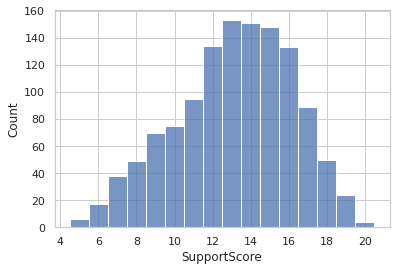

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

histplot = sns.histplot(x="SupportScore", discrete=True, data=Pre_Updated)

## Using a JOIN to Recode Pre Outcomes

The mutate() and case_when() methodology for recoding does **not** scale.  For example, consider the recoding that needs to be done for Stress section.  The stress question has 15 parts and thus 15 mutate() and case_when() statements will need to be coded.  Furthermore, if the scoring of questions varies or changes, your code will need to be rewritten!  Overall, the brute force approach done above is *not* desirable.

In this section, we will consider a more scalable and efficient apporach to obtain the necessary recoding.

In [34]:
Pre = pd.read_csv("/content/sample_data/PreSurveys.csv") 

Taking a look at the orginal dataframe.

In [35]:
Pre.shape

(1255, 27)

The recoding process requires that our data is put into a <strong>long</strong> format.  That is, the responses from the various questions will be stacked into a single column.

First, identify the columns to be stacked.
<p align='center'><img src="https://drive.google.com/uc?export=view&id=18Jm33fZcixpFBBKiO8cR8adeNLzwPsz6" width="50%" height="50%"></p>

Next step is to complete the stacking of the response columns.
<p align='center'><img src="https://drive.google.com/uc?export=view&id=1UUlaAzqWGcybD13H6Faf3X45FA68zy6v" width="30%" height="30%"></p>

Finally, a <strong>new</strong> field is necessary to identify which qustion each response is from.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=143KEH8HPwYIGpN-HW1y8MFkANjbNEon8" width="25%" height="25%"></p>





### Putting Pre Data into Long Format

The data can be put into the <strong>long</strong> format using the <strong>gather()</strong> function. Here, we will <strong>gather</strong> all the response columns into a single column.  When conducting this gather, a field to identify the questions will need to be included to separate the responses from one question from another.

In [36]:
Pre_Stacked = (
                Pre
               >> gather('Question_SubQuestion', 'Response',[X.Q1_1,
                                                 X.Q2_1,X.Q2_2,X.Q2_3,
                                                 X.Q3_1,X.Q3_2,X.Q3_3,X.Q3_4,X.Q3_5,X.Q3_6,X.Q3_7,X.Q3_8,X.Q3_9,X.Q3_10,X.Q3_11,X.Q3_12,X.Q3_13,X.Q3_14,X.Q3_15,
                                                 X.Q4_1,X.Q4_2,X.Q4_3,X.Q4_4,X.Q4_5
                                                 ])
              )
print(Pre_Stacked.to_string(index=False, max_rows=10))


 RowID     Date  surveyLinkID Question_SubQuestion   Response
     1  2/10/21  VRYHEBJPSQBG                 Q1_1  Sometimes
     2  2/10/21  GNSIGOXQBCXM                 Q1_1  Sometimes
     3  2/10/21  XGXMSAAEUYUC                 Q1_1     Seldom
     4  2/10/21  HTSURSVFKMAR                 Q1_1  Sometimes
     5  2/10/21  EFHWQFAWLUEY                 Q1_1     Seldom
...         ...           ...                  ...        ...
  1251   3/9/21  TLRSUEVRUEWK                 Q4_5         No
  1252   3/9/21  RRNKLCQLIWPT                 Q4_5         No
  1253   3/9/21  FFFSOUWSFSWA                 Q4_5         No
  1254   3/9/21  QYSIUBDVXSXW                 Q4_5         No
  1255   3/9/21  WEMIMWXLRMBW                 Q4_5         No


Next, use the <strong>str.split()</strong> function to split the Question_SubQuestion variable apart.  The is needed for the future JOIN.

In [37]:
Pre_Stacked_Updated = (
                        Pre_Stacked
                        >> mutate(Question = (X.Question_SubQuestion
                                               .str.split("_")
                                               .str[0]
                                             )
                                 )
                      )
print(Pre_Stacked_Updated.to_string(index=False, max_rows=10))

 RowID     Date  surveyLinkID Question_SubQuestion   Response Question
     1  2/10/21  VRYHEBJPSQBG                 Q1_1  Sometimes       Q1
     2  2/10/21  GNSIGOXQBCXM                 Q1_1  Sometimes       Q1
     3  2/10/21  XGXMSAAEUYUC                 Q1_1     Seldom       Q1
     4  2/10/21  HTSURSVFKMAR                 Q1_1  Sometimes       Q1
     5  2/10/21  EFHWQFAWLUEY                 Q1_1     Seldom       Q1
...         ...           ...                  ...        ...      ...
  1251   3/9/21  TLRSUEVRUEWK                 Q4_5         No       Q4
  1252   3/9/21  RRNKLCQLIWPT                 Q4_5         No       Q4
  1253   3/9/21  FFFSOUWSFSWA                 Q4_5         No       Q4
  1254   3/9/21  QYSIUBDVXSXW                 Q4_5         No       Q4
  1255   3/9/21  WEMIMWXLRMBW                 Q4_5         No       Q4


The recoding / scoring for Q4 requires that the sub question be included because some parts of Q4 have a score of 1 for Yes and other parts have a score of 2 for Yes. The following code that fixes the issues with Q4 and retains the subquestion portion as needed.

In [38]:
Pre_Stacked_Updated = (
                        Pre_Stacked_Updated
                        >> mutate(QuestionFix = if_else( X.Question_SubQuestion.str.split("_").str[0] == "Q4",
                                                        X.Question_SubQuestion,
                                                        X.Question_SubQuestion.str.split("_").str[0]   
                                                    )
                                 )
                      )
print(Pre_Stacked_Updated.to_string(index=False, max_rows=10))

 RowID     Date  surveyLinkID Question_SubQuestion   Response Question QuestionFix
     1  2/10/21  VRYHEBJPSQBG                 Q1_1  Sometimes       Q1          Q1
     2  2/10/21  GNSIGOXQBCXM                 Q1_1  Sometimes       Q1          Q1
     3  2/10/21  XGXMSAAEUYUC                 Q1_1     Seldom       Q1          Q1
     4  2/10/21  HTSURSVFKMAR                 Q1_1  Sometimes       Q1          Q1
     5  2/10/21  EFHWQFAWLUEY                 Q1_1     Seldom       Q1          Q1
...         ...           ...                  ...        ...      ...         ...
  1251   3/9/21  TLRSUEVRUEWK                 Q4_5         No       Q4        Q4_5
  1252   3/9/21  RRNKLCQLIWPT                 Q4_5         No       Q4        Q4_5
  1253   3/9/21  FFFSOUWSFSWA                 Q4_5         No       Q4        Q4_5
  1254   3/9/21  QYSIUBDVXSXW                 Q4_5         No       Q4        Q4_5
  1255   3/9/21  WEMIMWXLRMBW                 Q4_5         No       Q4        Q4_5


The last befor the JOIN is to concatenate the Question and Response fields into a single column.  This new field will be the <strong>key</strong> for the JOIN and should match the <sttong>key</strong> in the Question Scoring data.

In [39]:
Pre_Stacked_Updated = (
                        Pre_Stacked_Updated
                        >> mutate(Q_Response = X.QuestionFix + '_' + X.Response)
                      )
print(Pre_Stacked_Updated.to_string(index=False, max_rows=10))

 RowID     Date  surveyLinkID Question_SubQuestion   Response Question QuestionFix    Q_Response
     1  2/10/21  VRYHEBJPSQBG                 Q1_1  Sometimes       Q1          Q1  Q1_Sometimes
     2  2/10/21  GNSIGOXQBCXM                 Q1_1  Sometimes       Q1          Q1  Q1_Sometimes
     3  2/10/21  XGXMSAAEUYUC                 Q1_1     Seldom       Q1          Q1     Q1_Seldom
     4  2/10/21  HTSURSVFKMAR                 Q1_1  Sometimes       Q1          Q1  Q1_Sometimes
     5  2/10/21  EFHWQFAWLUEY                 Q1_1     Seldom       Q1          Q1     Q1_Seldom
...         ...           ...                  ...        ...      ...         ...           ...
  1251   3/9/21  TLRSUEVRUEWK                 Q4_5         No       Q4        Q4_5       Q4_5_No
  1252   3/9/21  RRNKLCQLIWPT                 Q4_5         No       Q4        Q4_5       Q4_5_No
  1253   3/9/21  FFFSOUWSFSWA                 Q4_5         No       Q4        Q4_5       Q4_5_No
  1254   3/9/21  QYSIUBDVXSXW 

### Read-in the Question Scoring Table

In [40]:
Question_Scoring = pd.read_csv("/content/sample_data/Question_Scoring.csv") 

Making sure the Question Scoring table was read in correctly.

In [41]:
print(Question_Scoring.to_string(index=False))

Question                       Response                        Q_Response  Score
      Q1                         Always                         Q1_Always    5.0
      Q1                          Often                          Q1_Often    4.0
      Q1                      Sometimes                      Q1_Sometimes    3.0
      Q1                         Seldom                         Q1_Seldom    2.0
      Q1                    Hardly Ever                    Q1_Hardly Ever    1.0
      Q1     I do not have a supervisor     Q1_I do not have a supervisor    NaN
      Q2         To a very large extent         Q2_To a very large extent    5.0
      Q2              To a large extent              Q2_To a large extent    4.0
      Q2                       Somewhat                       Q2_Somewhat    3.0
      Q2              To a small extent              Q2_To a small extent    2.0
      Q2         To a very small extent         Q2_To a very small extent    1.0
      Q2     I do not have a

### JOIN:  Pre + Question_Scoring

Next, we will complete the JOIN between the Pre outcomes and scoring information from the Question Scoring data.  The code includes a SELECT() and rename() to tidy up the results from the JOIN.

In [95]:
Pre_Stacked_withScores = (
                            Pre_Stacked_Updated
                            >> left_join(Question_Scoring, by='Q_Response')
                            >> select(X.RowID, X.surveyLinkID,X.Question_SubQuestion,X.Response_x,X.Question_x,X.QuestionFix,X.Q_Response,X.Score)
                            >> rename(Response = X.Response_x,Question = X.Question_x)
                          )
print(Pre_Stacked_withScores.to_string(index=False, max_rows=10))

 RowID  surveyLinkID Question_SubQuestion   Response Question QuestionFix    Q_Response  Score
     1  VRYHEBJPSQBG                 Q1_1  Sometimes       Q1          Q1  Q1_Sometimes    3.0
     2  GNSIGOXQBCXM                 Q1_1  Sometimes       Q1          Q1  Q1_Sometimes    3.0
     3  XGXMSAAEUYUC                 Q1_1     Seldom       Q1          Q1     Q1_Seldom    2.0
     4  HTSURSVFKMAR                 Q1_1  Sometimes       Q1          Q1  Q1_Sometimes    3.0
     5  EFHWQFAWLUEY                 Q1_1     Seldom       Q1          Q1     Q1_Seldom    2.0
...              ...                  ...        ...      ...         ...           ...    ...
  1251  TLRSUEVRUEWK                 Q4_5         No       Q4        Q4_5       Q4_5_No    0.0
  1252  RRNKLCQLIWPT                 Q4_5         No       Q4        Q4_5       Q4_5_No    0.0
  1253  FFFSOUWSFSWA                 Q4_5         No       Q4        Q4_5       Q4_5_No    0.0
  1254  QYSIUBDVXSXW                 Q4_5         

The overall score for Support from Supervisor requires scores from Q1 and Q2 to be combined.  Thus, the same label will need to be used in the group_by() statement in order to combine these scores.

In [96]:
Pre_Stacked_withScores = (
                            Pre_Stacked_withScores
                            >> mutate(Question2 = case_when(
                                                              [X.Question == "Q1", "Q12"],
                                                              [X.Question == "Q2", "Q12"],
                                                              [X.Question == "Q3", "Q3"],
                                                              [X.Question == "Q4", "Q4"]                                                             
                                                           )
                                     )
                        )
print(Pre_Stacked_withScores.to_string(index=False, max_rows=10))

 RowID  surveyLinkID Question_SubQuestion   Response Question QuestionFix    Q_Response  Score Question2
     1  VRYHEBJPSQBG                 Q1_1  Sometimes       Q1          Q1  Q1_Sometimes    3.0       Q12
     2  GNSIGOXQBCXM                 Q1_1  Sometimes       Q1          Q1  Q1_Sometimes    3.0       Q12
     3  XGXMSAAEUYUC                 Q1_1     Seldom       Q1          Q1     Q1_Seldom    2.0       Q12
     4  HTSURSVFKMAR                 Q1_1  Sometimes       Q1          Q1  Q1_Sometimes    3.0       Q12
     5  EFHWQFAWLUEY                 Q1_1     Seldom       Q1          Q1     Q1_Seldom    2.0       Q12
...              ...                  ...        ...      ...         ...           ...    ...       ...
  1251  TLRSUEVRUEWK                 Q4_5         No       Q4        Q4_5       Q4_5_No    0.0        Q4
  1252  RRNKLCQLIWPT                 Q4_5         No       Q4        Q4_5       Q4_5_No    0.0        Q4
  1253  FFFSOUWSFSWA                 Q4_5         No   

Finally, tidy the dataframe up a little.

In [97]:
Pre_Stacked_withScores = (
                            Pre_Stacked_withScores
                            >> select(X.RowID, X.surveyLinkID, X.Question2, X.Score)
                            >> rename(Question = X.Question2)
                          )
print(Pre_Stacked_withScores.to_string(index=False, max_rows=10))

 RowID  surveyLinkID Question  Score
     1  VRYHEBJPSQBG      Q12    3.0
     2  GNSIGOXQBCXM      Q12    3.0
     3  XGXMSAAEUYUC      Q12    2.0
     4  HTSURSVFKMAR      Q12    3.0
     5  EFHWQFAWLUEY      Q12    2.0
...              ...      ...    ...
  1251  TLRSUEVRUEWK       Q4    0.0
  1252  RRNKLCQLIWPT       Q4    0.0
  1253  FFFSOUWSFSWA       Q4    0.0
  1254  QYSIUBDVXSXW       Q4    0.0
  1255  WEMIMWXLRMBW       Q4    0.0


### Getting the Overall Scores for Pre

For each person, get an overall score:

*  Support from Supervisor (Q1 & Q2 - 3 parts)
*  Stress (Q3 - 15 parts)
*  Workplace Violence (Q4 - 5 parts) 


In [99]:
Pre_Scores = (
              Pre_Stacked_withScores
              >> group_by(X.surveyLinkID,X.Question)
              >> summarize(Score = X.Score.sum())
              )
print(Pre_Scores.to_string(index=False, max_rows=10))

Question  surveyLinkID  Score
     Q12  ABASIQJSRFGA   12.0
      Q3  ABASIQJSRFGA   17.0
      Q4  ABASIQJSRFGA    0.0
     Q12  ABEPJDQHOQDM   14.0
      Q3  ABEPJDQHOQDM   37.0
...                ...    ...
      Q3  YXTLUBNNQVIX   38.0
      Q4  YXTLUBNNQVIX    2.0
     Q12  YYXUAMCEAQNT   15.0
      Q3  YYXUAMCEAQNT   21.0
      Q4  YYXUAMCEAQNT    0.0


Finally, use <strong>seperate</strong> to put back the scores from each section into individual columns.

In [101]:
Pre_Scores_Wide = (
                    Pre_Scores
                    >> mutate(Time_Question = "Pre_" + X.Question)
                    >> select(~X.Question) 
                    >> spread(X.Time_Question, X.Score)      

                 )

print(Pre_Scores_Wide.to_string(index=False, max_rows=10))

 surveyLinkID  Pre_Q12  Pre_Q3  Pre_Q4
 ABASIQJSRFGA     12.0    17.0     0.0
 ABEPJDQHOQDM     14.0    37.0     3.0
 ABTVNASQBFMK      0.0    54.0     4.0
 ACIMNUQCAQTG     12.0    51.0     3.0
 ACIQVRFTUDDV     15.0    47.0     4.0
...                ...     ...     ...
 YWXEBJPNHDXC     20.0    31.0     1.0
 YXKDSKVXXPCR     17.0    35.0     1.0
 YXNJUCBDETYC     16.0    43.0     2.0
 YXTLUBNNQVIX     16.0    38.0     2.0
 YYXUAMCEAQNT     15.0    21.0     0.0


## Using a JOIN to Recode Post Outcomes

First, read-in the Post outcomes.

In [103]:
Post = pd.read_csv("/content/sample_data/PostSurveys.csv") 

Looking at the original Post dataframe.

In [104]:
print(Post.to_string(index=False, max_rows=10))

 RowID       Date  surveyLinkID         Q1_1                    Q2_1                    Q2_2                    Q2_3                      Q3_1                      Q3_2                      Q3_3                      Q3_4                      Q3_5                      Q3_6                      Q3_7                      Q3_8                      Q3_9                     Q3_10                     Q3_11                     Q3_12                     Q3_13                     Q3_14                     Q3_15 Q4_1 Q4_2 Q4_3 Q4_4 Q4_5
     1  3/18/2021  VRYHEBJPSQBG       Always       To a large extent  To a very large extent  To a very large extent  A small part of the time                Not at all  A small part of the time          Part of the time                Not at all                Not at all  A small part of the time                Not at all  A small part of the time          Part of the time                Not at all                Not at all                Not at all          Part

First step is to use <strong>gather()</strong> to stack the responses into a single column.

In [105]:
Post_Stacked = (
                Post
               >> gather('Question_SubQuestion', 'Response',[X.Q1_1,
                                                 X.Q2_1,X.Q2_2,X.Q2_3,
                                                 X.Q3_1,X.Q3_2,X.Q3_3,X.Q3_4,X.Q3_5,X.Q3_6,X.Q3_7,X.Q3_8,X.Q3_9,X.Q3_10,X.Q3_11,X.Q3_12,X.Q3_13,X.Q3_14,X.Q3_15,
                                                 X.Q4_1,X.Q4_2,X.Q4_3,X.Q4_4,X.Q4_5
                                                 ])
              )
print(Post_Stacked.to_string(index=False, max_rows=10))

 RowID       Date  surveyLinkID Question_SubQuestion   Response
     1  3/18/2021  VRYHEBJPSQBG                 Q1_1     Always
     2  3/18/2021  GNSIGOXQBCXM                 Q1_1      Often
     3  3/18/2021  HTSURSVFKMAR                 Q1_1  Sometimes
     4  3/18/2021  MHQOJTTAUVSL                 Q1_1     Always
     5  3/18/2021  EFHWQFAWLUEY                 Q1_1  Sometimes
...           ...           ...                  ...        ...
   919  4/17/2021  IEFCTGBUUIEH                 Q4_5         No
   920  4/17/2021  TLRSUEVRUEWK                 Q4_5         No
   921  4/17/2021  RRNKLCQLIWPT                 Q4_5         No
   922  4/17/2021  FFFSOUWSFSWA                 Q4_5         No
   923  4/17/2021  WEMIMWXLRMBW                 Q4_5         No


Next, create the Question and QuestionFix fields to prepare for the upcoming JOIN with the Question Scoring table.

In [106]:
Post_Stacked_Updated = (
                        Post_Stacked
                        >> mutate(Question = (X.Question_SubQuestion
                                               .str.split("_")
                                               .str[0]
                                             )
                                 )
                        >> mutate(QuestionFix = if_else( X.Question_SubQuestion.str.split("_").str[0] == "Q4",
                                                        X.Question_SubQuestion,
                                                        X.Question_SubQuestion.str.split("_").str[0]   
                                                    )
                                 )
                        >> mutate(Q_Response = X.QuestionFix + '_' + X.Response)
                      )
print(Post_Stacked_Updated.to_string(index=False, max_rows=10))

 RowID       Date  surveyLinkID Question_SubQuestion   Response Question QuestionFix    Q_Response
     1  3/18/2021  VRYHEBJPSQBG                 Q1_1     Always       Q1          Q1     Q1_Always
     2  3/18/2021  GNSIGOXQBCXM                 Q1_1      Often       Q1          Q1      Q1_Often
     3  3/18/2021  HTSURSVFKMAR                 Q1_1  Sometimes       Q1          Q1  Q1_Sometimes
     4  3/18/2021  MHQOJTTAUVSL                 Q1_1     Always       Q1          Q1     Q1_Always
     5  3/18/2021  EFHWQFAWLUEY                 Q1_1  Sometimes       Q1          Q1  Q1_Sometimes
...           ...           ...                  ...        ...      ...         ...           ...
   919  4/17/2021  IEFCTGBUUIEH                 Q4_5         No       Q4        Q4_5       Q4_5_No
   920  4/17/2021  TLRSUEVRUEWK                 Q4_5         No       Q4        Q4_5       Q4_5_No
   921  4/17/2021  RRNKLCQLIWPT                 Q4_5         No       Q4        Q4_5       Q4_5_No
   922  4/

Next, complete the JOIN with the Question Scoring table.

In [114]:
Post_Stacked_withScores = (
                            Post_Stacked_Updated
                            >> left_join(Question_Scoring, by='Q_Response')
                            >> select(X.RowID, X.surveyLinkID,X.Question_SubQuestion,X.Response_x,X.Question_x,X.QuestionFix,X.Q_Response,X.Score)
                            >> rename(Response = X.Response_x,Question = X.Question_x)
                          )
print(Post_Stacked_withScores.to_string(index=False, max_rows=10))

 RowID  surveyLinkID Question_SubQuestion   Response Question QuestionFix    Q_Response  Score
     1  VRYHEBJPSQBG                 Q1_1     Always       Q1          Q1     Q1_Always    5.0
     2  GNSIGOXQBCXM                 Q1_1      Often       Q1          Q1      Q1_Often    4.0
     3  HTSURSVFKMAR                 Q1_1  Sometimes       Q1          Q1  Q1_Sometimes    3.0
     4  MHQOJTTAUVSL                 Q1_1     Always       Q1          Q1     Q1_Always    5.0
     5  EFHWQFAWLUEY                 Q1_1  Sometimes       Q1          Q1  Q1_Sometimes    3.0
...              ...                  ...        ...      ...         ...           ...    ...
   919  IEFCTGBUUIEH                 Q4_5         No       Q4        Q4_5       Q4_5_No    0.0
   920  TLRSUEVRUEWK                 Q4_5         No       Q4        Q4_5       Q4_5_No    0.0
   921  RRNKLCQLIWPT                 Q4_5         No       Q4        Q4_5       Q4_5_No    0.0
   922  FFFSOUWSFSWA                 Q4_5         

Once again, need to create a new field that identifies that Q1 and Q2 should be combined when obtaining the Support from Supervisor score.

In [115]:
Post_Stacked_withScores = (
                            Post_Stacked_withScores
                            >> mutate(Question2 = case_when(
                                                              [X.Question == "Q1", "Q12"],
                                                              [X.Question == "Q2", "Q12"],
                                                              [X.Question == "Q3", "Q3"],
                                                              [X.Question == "Q4", "Q4"]                                                             
                                                           )
                                     )
                          )
Post_Stacked_withScores = (
                            Post_Stacked_withScores
                            >> select(X.RowID, X.surveyLinkID, X.Question2, X.Score)
                            >> rename(Question = X.Question2)
                          )

print(Post_Stacked_withScores.to_string(index=False, max_rows=10))

 RowID  surveyLinkID Question  Score
     1  VRYHEBJPSQBG      Q12    5.0
     2  GNSIGOXQBCXM      Q12    4.0
     3  HTSURSVFKMAR      Q12    3.0
     4  MHQOJTTAUVSL      Q12    5.0
     5  EFHWQFAWLUEY      Q12    3.0
...              ...      ...    ...
   919  IEFCTGBUUIEH       Q4    0.0
   920  TLRSUEVRUEWK       Q4    0.0
   921  RRNKLCQLIWPT       Q4    0.0
   922  FFFSOUWSFSWA       Q4    0.0
   923  WEMIMWXLRMBW       Q4    0.0


Getting the Overall Score for Post and creating a wide version of the dataframe.

In [117]:
Post_Scores_Wide = (
              Post_Stacked_withScores
              >> group_by(X.surveyLinkID,X.Question)
              >> summarize(Score = X.Score.sum())
              >> mutate(Time_Question = "Post_" + X.Question)
              >> select(~X.Question) 
              >> spread(X.Time_Question, X.Score)  
              )
print(Post_Stacked_withScores.to_string(index=False, max_rows=10))

 RowID  surveyLinkID Question  Score
     1  VRYHEBJPSQBG      Q12    5.0
     2  GNSIGOXQBCXM      Q12    4.0
     3  HTSURSVFKMAR      Q12    3.0
     4  MHQOJTTAUVSL      Q12    5.0
     5  EFHWQFAWLUEY      Q12    3.0
...              ...      ...    ...
   919  IEFCTGBUUIEH       Q4    0.0
   920  TLRSUEVRUEWK       Q4    0.0
   921  RRNKLCQLIWPT       Q4    0.0
   922  FFFSOUWSFSWA       Q4    0.0
   923  WEMIMWXLRMBW       Q4    0.0


## JOIN:  Pre + Post

An <strong>OUTER JOIN</strong> implies that outcomes from either table are to be included in the final table.  In contract, an INNER JOIN implies that only outcomes that exist in both tables are to be included in the final table.

The two separate tables -- Pre and Post.
<p align='center'><img src="https://drive.google.com/uc?export=view&id=1oFpEh212uKiHNWeJIvdibF2gHgP-X76G" width="50%" height="50%"></p>

The JOIN should include <strong>all</strong> outcomes -- outcomes from either table. 
<p align='center'><img src="https://drive.google.com/uc?export=view&id=1OmmUbz5q-NQjiDLYYws0lwLFQKryM1t7" width="50%" height="50%"></p>



The <strong>outer_join()</strong> function from the <strong>dfply</strong> package is used here to complete the <strong>OUTER JOIN</strong>. 

In [119]:
All_Scores = (
              Pre_Scores_Wide
              >> outer_join(Post_Scores_Wide, by="surveyLinkID")
            )

print(All_Scores.to_string(index=False, max_rows=10))

 surveyLinkID  Pre_Q12  Pre_Q3  Pre_Q4  Post_Q12  Post_Q3  Post_Q4
 ABASIQJSRFGA     12.0    17.0     0.0      17.0     27.0      1.0
 ABEPJDQHOQDM     14.0    37.0     3.0      16.0     35.0      2.0
 ABTVNASQBFMK      0.0    54.0     4.0      16.0     39.0      2.0
 ACIMNUQCAQTG     12.0    51.0     3.0      17.0     19.0      0.0
 ACIQVRFTUDDV     15.0    47.0     4.0       NaN      NaN      NaN
...                ...     ...     ...       ...      ...      ...
 XSYUSOAOPPVK      NaN     NaN     NaN      17.0     23.0      0.0
 YHOVLHIFATDY      NaN     NaN     NaN      14.0     28.0      1.0
 YLXISPMWISGE      NaN     NaN     NaN      17.0     32.0      1.0
 YPKAJDBHLNXT      NaN     NaN     NaN      12.0     53.0      4.0
 YVEBGQLWCLRC      NaN     NaN     NaN      14.0     42.0      2.0


## Computing Change Scores

Next, compute the change scores as appropriate. 

<p align="center">
<font size="+2">Change Score = Post - Pre</font>
</p>

In [120]:
All_Scores = (
                All_Scores
                >> mutate(Change_Q12 = X.Post_Q12 - X.Pre_Q12,
                          Change_Q3 = X.Post_Q3 - X.Pre_Q3,
                          Change_Q4 = X.Post_Q4 - X.Pre_Q4
                         )
            )
print(All_Scores.to_string(index=False, max_rows=10))


 surveyLinkID  Pre_Q12  Pre_Q3  Pre_Q4  Post_Q12  Post_Q3  Post_Q4  Change_Q12  Change_Q3  Change_Q4
 ABASIQJSRFGA     12.0    17.0     0.0      17.0     27.0      1.0         5.0       10.0        1.0
 ABEPJDQHOQDM     14.0    37.0     3.0      16.0     35.0      2.0         2.0       -2.0       -1.0
 ABTVNASQBFMK      0.0    54.0     4.0      16.0     39.0      2.0        16.0      -15.0       -2.0
 ACIMNUQCAQTG     12.0    51.0     3.0      17.0     19.0      0.0         5.0      -32.0       -3.0
 ACIQVRFTUDDV     15.0    47.0     4.0       NaN      NaN      NaN         NaN        NaN        NaN
...                ...     ...     ...       ...      ...      ...         ...        ...        ...
 XSYUSOAOPPVK      NaN     NaN     NaN      17.0     23.0      0.0         NaN        NaN        NaN
 YHOVLHIFATDY      NaN     NaN     NaN      14.0     28.0      1.0         NaN        NaN        NaN
 YLXISPMWISGE      NaN     NaN     NaN      17.0     32.0      1.0         NaN        NaN  

Getting the average change score for each section (Support from Supervisor, Stress, and Workplace Violence).

In [127]:
(
    All_Scores
    >> select(X.Change_Q12, X.Change_Q3, X.Change_Q4)
    >> gather('Question', 'Score', [X.Change_Q12,X.Change_Q3,X.Change_Q4])
    >> group_by(X.Question)
    >> summarize(Mean = X.Score.mean())
)

,Question,Mean
0,Change_Q12,1.233990
1,Change_Q3,-4.592365
2,Change_Q4,-0.732759


A histogram of the change scores for Stress.

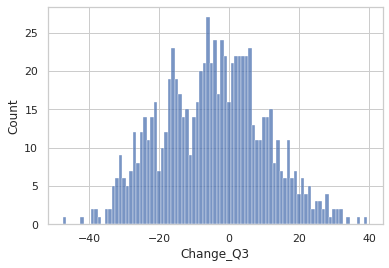

In [126]:
#Histogram of Change Scores
histplot = sns.histplot(x="Change_Q3", discrete=True, data=All_Scores)

Next, consider a scatterplot of the Pre and Post Outcomes for Stress.

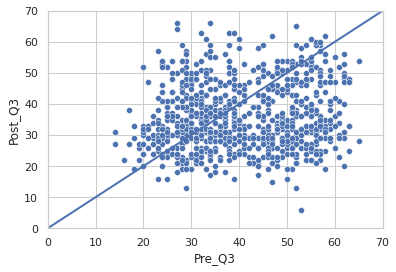

In [131]:
import matplotlib.pyplot as plt

xyplot = sns.scatterplot(x="Pre_Q3", y="Post_Q3", data=All_Scores)

# control x and y limits
plt.ylim(0, 70)
plt.xlim(0, 70)

#Adding a Y=X line.
plt.plot([0, 70], [0, 70], linewidth=2)

plt.show()


Getting the correlation between Pre and Post for stress.

In [132]:
round(All_Scores.Pre_Q3.corr(All_Scores.Post_Q3),3)

0.116

Next, histogram of the change scores for Q4, i.e. Workplace Violence.

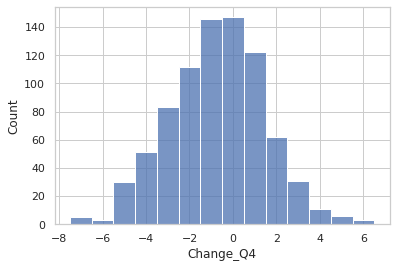

In [ ]:
#Histogram of Change Scores for Violence
histplot = sns.histplot(x="Change_Q4", discrete=True, data=All_Scores)

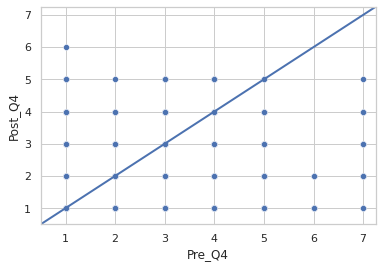

In [ ]:

xyplot = sns.scatterplot(x="Pre_Q4", y="Post_Q4", data=All_Scores)

# control x and y limits
plt.ylim(0.5, 7.25)
plt.xlim(0.5, 7.25)

plt.plot([0, 8], [0, 8], linewidth=2)

plt.show()

More plots --- how about scatterplot for Pre and Post Stress conditioned on Pre Score for Q12...  Ugly...

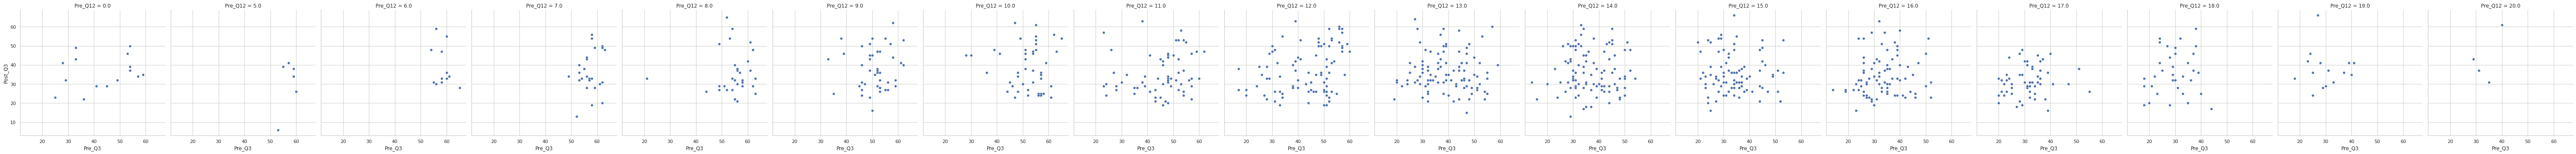

In [129]:
sns.relplot(
    data=All_Scores, x="Pre_Q3", y="Post_Q3",
    col="Pre_Q12", 
    kind="scatter"
)